# Demo of the qwgraph package
This file is a demonstration for the qwgraph python package.
The package aim is to provide an efficient implementation of the quantum walk based search on arbitrary graphs described in https://arxiv.org/abs/2310.10451

This file is cut into three parts: 
1. Introduction to the class QWSearch
2. Searching an edge in the complete graph
3. Searching several nodes in a 2D grid

In [1]:
##############################################
##                  Imports                 ##
##############################################
# Maths
import numpy as np
import math 
from math import pi 
# Plot
import matplotlib.pyplot as plt
import seaborn as sns
# Graph
import networkx as nx 
# Utilities
import copy
from tqdm import tqdm
import pandas as pd
# Plot configuration
sns.set()
sns.set_context("poster")
sns.set_style("ticks")

# Import the package
from qwgraph import QWSearch,coins

## 1. Introduction to the class QWSearch
### 1.1 Initializing a QWSearch object and modifying it

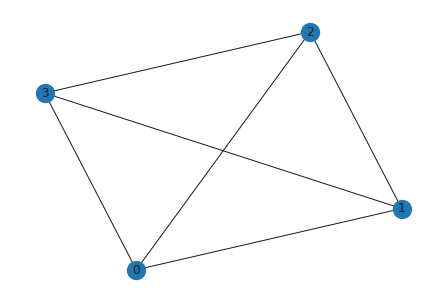

In [2]:
# The bipartite graph is created via networkx
G = nx.complete_graph(4)
nx.draw(G,with_labels=True)

In [3]:
# We create the associated QW
qw = QWSearch(G)

# The initial state of the QW is diagonal by default
state = qw.state()
for edge in state:
    print(f"{edge} : {state[edge]}")

(0, 1) : [0.28867513+0.j 0.28867513+0.j]
(0, 2) : [0.28867513+0.j 0.28867513+0.j]
(0, 3) : [0.28867513+0.j 0.28867513+0.j]
(1, 2) : [0.28867513+0.j 0.28867513+0.j]
(1, 3) : [0.28867513+0.j 0.28867513+0.j]
(2, 3) : [0.28867513+0.j 0.28867513+0.j]


In [4]:
# The state of the QW can be modified using a dictionnary
for edge in state:
    state[edge] = [2,1j]
qw.set_state(state)

# The new state will automatically be normalized
state = qw.state()
for edge in state:
    print(f"{edge} : {state[edge]}")

(0, 1) : [0.36514837+0.j         0.        +0.18257419j]
(0, 2) : [0.36514837+0.j         0.        +0.18257419j]
(0, 3) : [0.36514837+0.j         0.        +0.18257419j]
(1, 2) : [0.36514837+0.j         0.        +0.18257419j]
(1, 3) : [0.36514837+0.j         0.        +0.18257419j]
(2, 3) : [0.36514837+0.j         0.        +0.18257419j]


In [5]:
# It is possible to reset the state to a diagonal one with reset
qw.reset()
state = qw.state()
for edge in state:
    print(f"{edge} : {state[edge]}")

(0, 1) : [0.28867513+0.j 0.28867513+0.j]
(0, 2) : [0.28867513+0.j 0.28867513+0.j]
(0, 3) : [0.28867513+0.j 0.28867513+0.j]
(1, 2) : [0.28867513+0.j 0.28867513+0.j]
(1, 3) : [0.28867513+0.j 0.28867513+0.j]
(2, 3) : [0.28867513+0.j 0.28867513+0.j]


In [6]:
# By entering specific edges, one can access the state for those edges only
state = qw.state([qw.edges()[0]])
for edge in state:
    print(f"{edge} : {state[edge]}")

(0, 1) : [0.28867513+0.j 0.28867513+0.j]


In [7]:
# One can get the probability of measuring one edge
print(f"proba of measuring edge {qw.edges()[0]} : {qw.get_proba([qw.edges()[0]])}")
# Or even several edges
print(f"proba of measuring edge {qw.edges()[0]} or edge {qw.edges()[1]} : {qw.get_proba([qw.edges()[0],qw.edges()[1]])}")
# Or all of them
print(f"proba of measuring something : {qw.get_proba(qw.edges())}")

proba of measuring edge (0, 1) : 0.1666666666666667
proba of measuring edge (0, 1) or edge (0, 2) : 0.3333333333333334
proba of measuring something : 1.0000000000000002


### 1.2 Running the QWSearch
This package provide 3 ways for the QWSearch to evolve.
+ `run` will let the QWSearch evolve for the desired number of time steps without returning anything. Inner state, probability of success and other can then be retrieved using other methods of the class.
+ `run_and_get` will do the same than run, but will return a dataframe with the probability of success at every steps.
+ `get_T_P` will retrieve the hitting time `T` and probability of success `P`.

2x2 matrices for coins and oracles can be found in qwsearch.coins

In [8]:
print("step 0")
state = qw.state()
for edge in state:
    print(f"{edge} : {state[edge]}")

step 0
(0, 1) : [0.28867513+0.j 0.28867513+0.j]
(0, 2) : [0.28867513+0.j 0.28867513+0.j]
(0, 3) : [0.28867513+0.j 0.28867513+0.j]
(1, 2) : [0.28867513+0.j 0.28867513+0.j]
(1, 3) : [0.28867513+0.j 0.28867513+0.j]
(2, 3) : [0.28867513+0.j 0.28867513+0.j]


In [9]:
qw.run(coins.X,-coins.X,searched=[qw.edges()[0],qw.edges()[1]],ticks=1)
print("step 1")
state = qw.state()
for edge in state:
    print(f"{edge} : {state[edge]}")

step 1
(0, 1) : [0.09622504+0.j 0.48112522+0.j]
(0, 2) : [0.09622504+0.j 0.48112522+0.j]
(0, 3) : [-0.48112522+0.j  0.28867513+0.j]
(1, 2) : [-0.09622504+0.j -0.09622504+0.j]
(1, 3) : [-0.09622504+0.j  0.28867513+0.j]
(2, 3) : [-0.09622504+0.j  0.28867513+0.j]


In [10]:
# We can also run and get information in one go
qw.reset()
qw.search(coins.X,-coins.X,searched=[qw.edges()[0],qw.edges()[1]],ticks=10,progress=True)

100%|████████████████████████████████████████| 10/10 [00:00<00:00, 80659.69it/s]


,step,p_succ,"(0, 1)","(0, 2)"
0,0,0.333333,0.166667,0.166667
1,1,0.481481,0.240741,0.240741
2,2,0.218107,0.109053,0.109053
3,3,0.084591,0.042295,0.042295
4,4,0.848702,0.424351,0.424351
5,5,0.150186,0.075093,0.075093
6,6,0.058862,0.029431,0.029431
7,7,0.762451,0.381226,0.381226
8,8,0.263293,0.131646,0.131646
9,9,0.103232,0.051616,0.051616


In [11]:
# It is also possible to get the evolution operator
qw.get_unitary(coins.X,-coins.X,searched=[qw.edges()[0],qw.edges()[1]],progress=True)

100%|████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 57456.22it/s]


array([[ 0.33333333+0.j,  0.        +0.j, -0.66666667+0.j,
         0.        +0.j,  0.        +0.j,  0.66666667+0.j,
         0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.33333333+0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.66666667+0.j,  0.        +0.j,
         0.66666667+0.j,  0.        +0.j,  0.        +0.j],
       [-0.66666667+0.j,  0.        +0.j,  0.33333333+0.j,
         0.        +0.j,  0.        +0.j,  0.66666667+0.j,
         0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.33333333+0.j,  0.        +0.j,  0.        +0.j,
         0.66666667+0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j,  0.66666667+0.j],
       [-0.66666667+0.j,  0.        +0.j, -0.6666666

In [12]:
# The optinal argument dataframe makes the function return a dataframe with the headers for the amplitudes.
qw.get_unitary(coins.X,-coins.X,searched=[qw.edges()[0],qw.edges()[1]],dataframe=True,progress=True)

100%|████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 55007.27it/s]


,"$\psi_{0,1}^-$","$\psi_{0,1}^+$","$\psi_{0,2}^-$","$\psi_{0,2}^+$","$\psi_{0,3}^-$","$\psi_{0,3}^+$","$\psi_{1,2}^-$","$\psi_{1,2}^+$","$\psi_{1,3}^-$","$\psi_{1,3}^+$","$\psi_{2,3}^-$","$\psi_{2,3}^+$"
"$\psi_{0,1}^-$",0.333333+0.000000j,0.000000+0.000000j,-0.666667+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.666667+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j
"$\psi_{0,1}^+$",0.000000+0.000000j,0.333333+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.666667+0.000000j,0.000000+0.000000j,0.666667+0.000000j,0.000000+0.000000j,0.000000+0.000000j
"$\psi_{0,2}^-$",-0.666667+0.000000j,0.000000+0.000000j,0.333333+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.666667+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j
"$\psi_{0,2}^+$",0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.333333+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.666667+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.666667+0.000000j
"$\psi_{0,3}^-$",-0.666667+0.000000j,0.000000+0.000000j,-0.666667+0.000000j,0.000000+0.000000j,0.000000+0.000000j,-0.333333+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j
"$\psi_{0,3}^+$",0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,-0.333333+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.666667+0.000000j,0.000000+0.000000j,0.666667+0.000000j,0.000000+0.000000j
"$\psi_{1,2}^-$",0.000000+0.000000j,-0.666667+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,-0.333333+0.000000j,0.000000+0.000000j,0.666667+0.000000j,0.000000+0.000000j,0.000000+0.000000j
"$\psi_{1,2}^+$",0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,-0.666667+0.000000j,0.000000+0.000000j,0.000000+0.000000j,-0.333333+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.666667+0.000000j
"$\psi_{1,3}^-$",0.000000+0.000000j,-0.666667+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.666667+0.000000j,0.000000+0.000000j,-0.333333+0.000000j,0.000000+0.000000j,0.000000+0.000000j
"$\psi_{1,3}^+$",0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.666667+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,-0.333333+0.000000j,0.000000+0.000000j,0.666667+0.000000j,0.000000+0.000000j


## 2. Example 1 : Searching an edge in the hypercube

4096 nodes and 24576 edges
0.8300884553657915 137


100%|█████████████████████████████████████| 1000/1000 [00:00<00:00, 5903.61it/s]


<AxesSubplot:xlabel='step', ylabel='p_succ'>

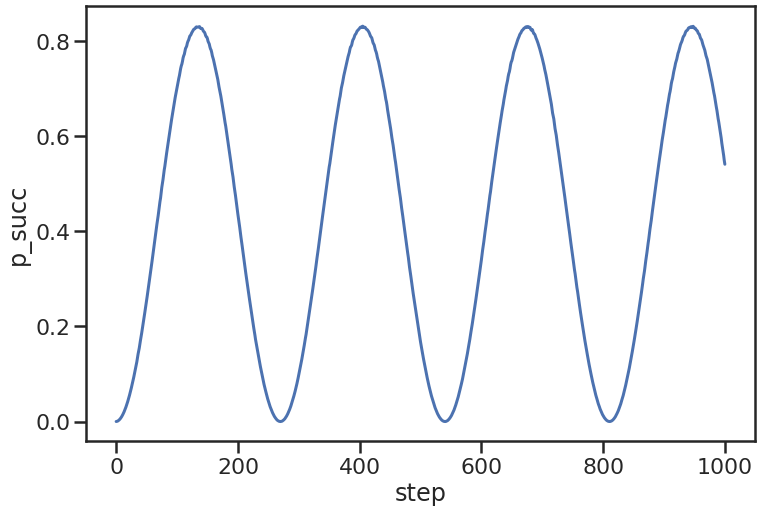

In [13]:
qw = QWSearch(nx.hypercube_graph(12))
print(f"{len(qw.nodes())} nodes and {len(qw.edges())} edges")
T,P = qw.get_T_P(coins.X,-coins.X,searched=[qw.edges()[0]])
print(P,T)
qw.reset()
result = qw.search(coins.X,-coins.X,searched=[qw.edges()[0]],ticks=1000,progress=True)

plt.figure(figsize=(12,8))
sns.lineplot(data=result, x="step", y="p_succ")

## 3. Example 2 : Searching 4 nodes in a 2D grid

32768 nodes and 49152 edges
0.30532879053796197 244


100%|█████████████████████████████████████| 2000/2000 [00:00<00:00, 2745.48it/s]


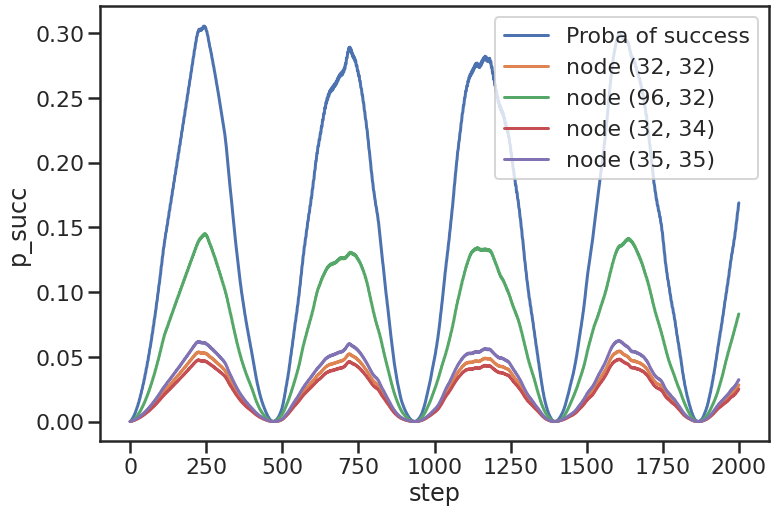

In [14]:
qw = QWSearch(nx.grid_2d_graph(128, 128, periodic=True),search_nodes=True)
search=[(32,32),(96,32),(32,34),(35,35)]
print(f"{len(qw.nodes())} nodes and {len(qw.edges())} edges")
T,P = qw.get_T_P(coins.X,-coins.X,searched=search)
print(P,T)
qw.reset()
result = qw.search(coins.X,-coins.X,searched=search,ticks=2000,progress=True)

plt.figure(figsize=(12,8))
sns.lineplot(data=result, x="step", y="p_succ", label="Proba of success")
for node in search:
    sns.lineplot(data=result, x="step", y=node, label="node " + str(node))